In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('Data_Train.xlsx')
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [3]:
# some null values are present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [4]:
# dropping insignificant attributes
df.drop(['RESTAURANT_ID','TIME'],axis=1,inplace=True)

In [5]:
# removing votes 
df['VOTES'] = df['VOTES'].str.strip('votes')

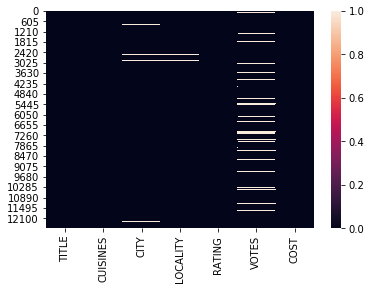

In [6]:
# plotting null values
sns.heatmap(df.isna())

In [7]:
df['CITY'].mode()

0    Chennai
dtype: object

In [8]:
df.drop('LOCALITY',axis=1,inplace=True)

In [9]:
df['VOTES'].fillna(df['VOTES'].dropna().astype('int64').mean(),inplace=True)

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
si = SimpleImputer(strategy='most_frequent')
df['CITY'] = si.fit_transform(df['CITY'].values.reshape(-1,1))

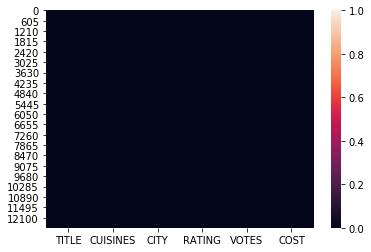

In [12]:
sns.heatmap(df.isna())

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TITLE     12690 non-null  object
 1   CUISINES  12690 non-null  object
 2   CITY      12690 non-null  object
 3   RATING    12688 non-null  object
 4   VOTES     12690 non-null  object
 5   COST      12690 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 595.0+ KB


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
df['TITLE'] = le.fit_transform(df['TITLE'].astype(str).values.reshape(-1,1))
df['CUISINES'] = le.fit_transform(df['CUISINES'].astype(str).values.reshape(-1,1))
df['CITY'] = le.fit_transform(df['CITY'].astype(str).values.reshape(-1,1))
df['RATING'] = le.fit_transform(df['RATING'].astype(str).values.reshape(-1,1))
df['COST'] = le.fit_transform(df['COST'].values.reshape(-1,1))

C:\Users\abhishek30april\ANACONDA\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
df['VOTES'] = df['VOTES'].astype('int32')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   TITLE     12690 non-null  int32
 1   CUISINES  12690 non-null  int32
 2   CITY      12690 non-null  int32
 3   RATING    12690 non-null  int32
 4   VOTES     12690 non-null  int32
 5   COST      12690 non-null  int64
dtypes: int32(5), int64(1)
memory usage: 347.1 KB


In [18]:
df.describe()

,TITLE,CUISINES,CITY,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,59.465721,2235.193932,142.281403,18.797794,415.605437,22.934437
std,32.762427,1204.091664,83.921428,6.183555,801.745654,12.229288
min,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,31.000000,1185.250000,67.000000,16.000000,64.000000,14.000000
50%,59.000000,2416.500000,131.000000,19.000000,200.000000,21.000000
75%,95.000000,3222.750000,222.000000,22.000000,415.000000,28.000000
max,112.000000,4154.000000,358.000000,32.000000,41186.000000,85.000000


In [19]:
from scipy.stats import zscore

In [20]:
z=np.abs(zscore(df))
z

array([[0.86888688, 0.32540837, 2.11776187, 0.2907493 , 0.45727704,
        1.06842513],
       [0.80783894, 1.61638078, 0.8970816 , 0.6796045 , 0.48097627,
        1.64084406],
       [0.86888688, 0.61526483, 0.8970816 , 0.03270197, 0.24273671,
        0.41423206],
       ...,
       [0.35207201, 0.12224961, 1.1525353 , 0.35615323, 0.23997903,
        1.31374753],
       [0.86888688, 1.055448  , 0.8970816 , 0.45247493, 0.47848161,
        0.32173514],
       [0.86888688, 0.59034881, 0.13443345, 0.61420056, 0.32604463,
        0.08713553]])

In [21]:
threshold=3
np.where(z>3)

(array([   13,    84,    85,   156,   178,   186,   196,   208,   235,
          253,   293,   303,   304,   308,   329,   337,   344,   354,
          369,   374,   379,   392,   396,   422,   428,   431,   438,
          452,   453,   455,   469,   473,   480,   502,   508,   510,
          563,   577,   604,   615,   625,   644,   690,   731,   749,
          751,   772,   775,   787,   796,   831,   838,   839,   852,
          855,   872,   874,   911,   913,   919,   949,   966,   967,
          973,   981,   993,   994,  1009,  1034,  1038,  1054,  1126,
         1132,  1133,  1147,  1151,  1193,  1196,  1205,  1227,  1244,
         1287,  1297,  1345,  1346,  1365,  1366,  1395,  1467,  1468,
         1470,  1472,  1475,  1476,  1502,  1522,  1540,  1543,  1555,
         1581,  1594,  1596,  1597,  1617,  1632,  1635,  1657,  1681,
         1685,  1696,  1701,  1711,  1748,  1759,  1764,  1778,  1792,
         1806,  1828,  1839,  1850,  1855,  1878,  1884,  1884,  1903,
      

In [22]:
df1 = df[(z<3).all(axis=1)]
df1

,TITLE,CUISINES,CITY,RATING,VOTES,COST
0,31,2627,320,17,49,36
1,33,289,67,23,30,43
2,31,2976,67,19,221,28
3,95,4130,222,22,24,28
4,50,1766,222,19,165,14
...,...,...,...,...,...,...
12685,95,2934,131,19,546,21
12686,33,2143,222,24,1214,49
12687,71,2088,239,21,608,39
12688,31,3506,67,16,32,19


In [23]:
df1.skew()

TITLE      -0.084475
CUISINES   -0.217346
CITY        0.313275
RATING      0.164571
VOTES       2.504171
COST        1.164843
dtype: float64

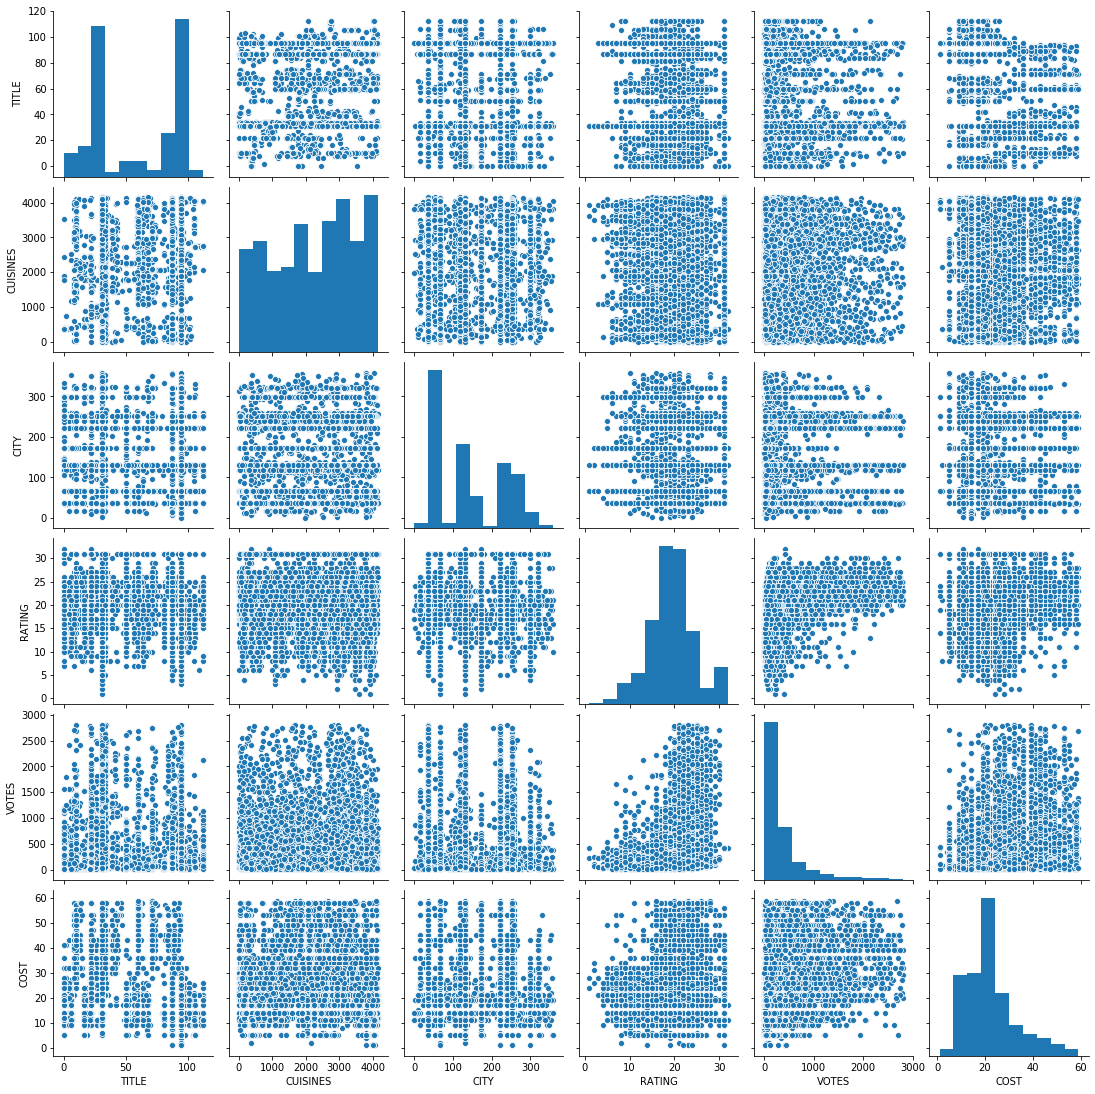

In [24]:
sns.pairplot(df1)

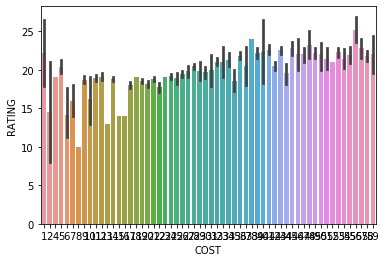

In [76]:
# as the rating is increased cost is also increased
sns.barplot(df1['COST'],df1['RATING'])

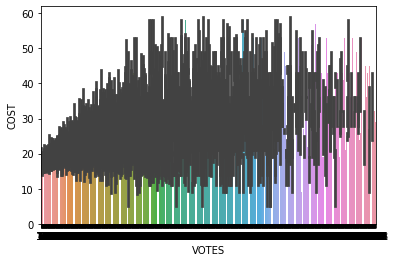

In [77]:
sns.barplot(df1['VOTES'],df1['COST'])

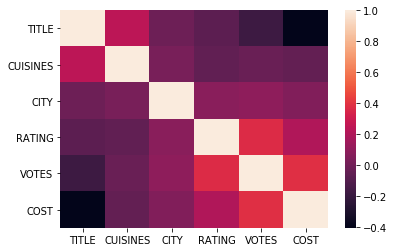

In [25]:
sns.heatmap(df1.corr())

TITLE          AxesSubplot(0.125,0.799681;0.352273x0.0803191)
CUISINES    AxesSubplot(0.547727,0.799681;0.352273x0.0803191)
CITY           AxesSubplot(0.125,0.703298;0.352273x0.0803191)
RATING      AxesSubplot(0.547727,0.703298;0.352273x0.0803191)
VOTES          AxesSubplot(0.125,0.606915;0.352273x0.0803191)
COST        AxesSubplot(0.547727,0.606915;0.352273x0.0803191)
dtype: object

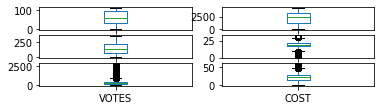

In [26]:
df1.plot(kind='box',subplots=True,layout=(8,2))

In [27]:
# since cuisines and city are highly non correlated we will drop them
df1.drop(['CUISINES','CITY'],axis=1,inplace=True)

C:\Users\abhishek30april\ANACONDA\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
# now the dataset is in numeric form
df1

,TITLE,RATING,VOTES,COST
0,31,17,49,36
1,33,23,30,43
2,31,19,221,28
3,95,22,24,28
4,50,19,165,14
...,...,...,...,...
12685,95,19,546,21
12686,33,24,1214,49
12687,71,21,608,39
12688,31,16,32,19


In [29]:
X = df1.drop('COST',axis=1)
y = df1['COST']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# we will use regression models 
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [33]:
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor()]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
# defined a function for evaluating the model using RMSEL
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2

In [78]:
for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    predm=m.predict(X_test)
    print('Accuracy Score of',m, 'is: ')
    print(mean_absolute_error(y_test,predm))
    print(mean_squared_error(y_test,predm))
    print(np.sqrt(mean_squared_error(y_test,predm)))
    print(score(predm,y_test))
    print(r2_score(y_test,predm))

Accuracy Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 
6.590156766162337
84.26342596264652
9.179511204995968
0.9171561758046631
0.27224008623214246
Accuracy Score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is: 
6.099901305601822
68.02170677077594
8.247527312520761
0.9149300730531653
0.4125153245515203
Accuracy Score of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) is: 
6.521494663845073
87.30748894823117
9.343847652237871
0.9189196207178274
0.2459493558163739
Accuracy Score of KNeigh

In [37]:
dtc = DecisionTreeRegressor()
params = {'criterion': ['mse','mae'],'splitter':['best','random']}
gscv = GridSearchCV(dtc,param_grid=params)
gscv.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'],
                         'splitter': ['best', 'random']},
             pre_dispatch='2*n_jobs', re

In [38]:
gscv.best_params_

{'criterion': 'mse', 'splitter': 'best'}

In [39]:
dtc=DecisionTreeRegressor(criterion='mse',splitter='best')
dtc.fit(X_train,y_train)
dtcpred=dtc.predict(X_test)
dtcpred

array([14.,  9., 11., ..., 11., 14., 21.])

In [40]:
print(score(predm,y_test))

0.925489463049671


In [41]:
r2_score(y_test,dtcpred)

0.41219432521656774

In [42]:
cvs = cross_val_score(DecisionTreeRegressor(criterion='mse',splitter='best'),X,y,cv=50)
cvs

array([0.36921152, 0.5263427 , 0.50712101, 0.47632592, 0.19191718,
       0.22351647, 0.45162249, 0.13467804, 0.60151854, 0.40832357,
       0.33875087, 0.30620086, 0.41802285, 0.18259318, 0.43338956,
       0.35619723, 0.20775799, 0.30317991, 0.41029541, 0.34735736,
       0.45520944, 0.33780676, 0.44760969, 0.32447299, 0.48663847,
       0.4126594 , 0.41945673, 0.36008568, 0.40103547, 0.22650443,
       0.1856794 , 0.55395183, 0.41466212, 0.03416751, 0.42782867,
       0.42702592, 0.44734382, 0.2455249 , 0.40910574, 0.43210283,
       0.40577546, 0.38506192, 0.54902729, 0.50014167, 0.31266897,
       0.47541475, 0.35223977, 0.56216709, 0.31512315, 0.47364582])

In [43]:
cvs.mean()

0.37948920708309325

In [44]:
cvs.max()

0.6015185428455676

In [45]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lrpred = lr.predict(X_test)
lrpred

array([25.29121886, 21.10050823, 17.6103603 , ..., 17.59589419,
       18.91935901, 23.4996934 ])

In [46]:
r2_score(y_test,lrpred)

0.27224008623214246

In [47]:
cvs = cross_val_score(LinearRegression(),X,y,cv=50)
cvs

array([0.22871668, 0.22672324, 0.31807097, 0.33361908, 0.2626729 ,
       0.24209909, 0.1638657 , 0.28653102, 0.26021573, 0.27811062,
       0.27763786, 0.24670997, 0.3134629 , 0.2029717 , 0.3239664 ,
       0.29902947, 0.32433569, 0.2828021 , 0.21778592, 0.3334848 ,
       0.34063334, 0.31811387, 0.19905188, 0.23901694, 0.27789888,
       0.28456316, 0.35128626, 0.22339418, 0.2911834 , 0.33277876,
       0.22119279, 0.1620627 , 0.31428936, 0.30596653, 0.24096807,
       0.25416808, 0.19575122, 0.24876576, 0.26741137, 0.24760794,
       0.3484205 , 0.21321228, 0.23121502, 0.16358318, 0.26497064,
       0.22759054, 0.35735147, 0.29311144, 0.24836581, 0.31620315])

In [48]:
cvs.mean()

0.2680588068337334

In [49]:
cvs.max()

0.3573514699601484

In [50]:
svr= SVR()
svr.fit(X_train,y_train)
svrpred = svr.predict(X_test)
svrpred

array([22.31248761, 19.5282021 , 15.69207289, ..., 15.42674321,
       19.03526434, 21.20227114])

In [51]:
params = {'C':[0.0001,0.001,0.01,0.1,1,10],'gamma':[0.1,1,10,100]}
gscv = GridSearchCV(svr,param_grid=params)
gscv.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [52]:
gscv.best_params_

{'C': 10, 'gamma': 0.1}

In [53]:
svr= SVR(C=10,gamma=0.1,kernel='rbf')
svr.fit(X_train,y_train)
svrpred = svr.predict(X_test)
svrpred

array([15.0352775 , 22.63748657, 14.23646441, ..., 12.93806755,
       17.62181337, 23.43655895])

In [64]:
print(score(svrpred,y_test))

0.9226836967056938


In [79]:
print(r2_score(y_test,svrpred))

0.29563173822269906


In [ ]:
svr= SVR(C=10,gamma=0.1,kernel='poly')
svr.fit(X_train,y_train)
svrpred = svr.predict(X_test)
svrpred

In [ ]:
print(score(svrpred,y_test))

In [ ]:
svr= SVR(C=10,gamma=0.1,kernel='linear')
svr.fit(X_train,y_train)
svrpred = svr.predict(X_test)
svrpred

In [ ]:
print(score(svrpred,y_test))

In [54]:
cvs = cross_val_score(SVR(C=10,gamma=0.1),X,y,cv=50)
cvs

array([0.33523687, 0.39663706, 0.32106036, 0.34847129, 0.27000343,
       0.29074807, 0.3046443 , 0.32395802, 0.30197297, 0.34859648,
       0.3138405 , 0.33026001, 0.36863452, 0.30374497, 0.34837213,
       0.39555122, 0.34080247, 0.30054213, 0.37104164, 0.34417885,
       0.34241469, 0.30716253, 0.36626573, 0.36635657, 0.29122986,
       0.34817543, 0.35911677, 0.25915913, 0.2912837 , 0.32354695,
       0.2907396 , 0.24074851, 0.43353785, 0.29766371, 0.28879131,
       0.21434207, 0.34096587, 0.35622167, 0.28543596, 0.36976222,
       0.31283778, 0.30933487, 0.35397557, 0.32264259, 0.3526998 ,
       0.26668452, 0.3910391 , 0.30664445, 0.35241615, 0.29612242])

In [55]:
cvs.mean()

0.32591229326685345

In [56]:
cvs.max()

0.43353785302407244

In [57]:
knn = KNeighborsRegressor()
params = {'n_neighbors': range(1,50)}
rscv = RandomizedSearchCV(knn,param_distributions=params)
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': range(1, 50)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [58]:
rscv.best_params_

{'n_neighbors': 8}

In [59]:
knn=KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train,y_train)
knnpred=knn.predict(X_test)
knnpred

array([21.5  , 23.125, 13.625, ..., 15.25 , 25.75 , 24.125])

In [60]:
print(score(knnpred,y_test))

0.9270884302905715


In [80]:
print(r2_score(y_test,knnpred))

0.3638579254850275


In [61]:
cvs = cross_val_score(KNeighborsRegressor(n_neighbors=6),X,y,cv=50)
cvs

array([0.3510173 , 0.39101203, 0.49123268, 0.49165332, 0.26832472,
       0.28432633, 0.39067568, 0.36708073, 0.3501309 , 0.35718132,
       0.38283222, 0.25961549, 0.23839024, 0.26084729, 0.37532694,
       0.43981378, 0.41514449, 0.25919268, 0.35252756, 0.33909642,
       0.47757819, 0.3245641 , 0.4287667 , 0.33836168, 0.3008104 ,
       0.37953912, 0.46693027, 0.28775903, 0.36637345, 0.40963833,
       0.25660285, 0.35749932, 0.49457564, 0.37695429, 0.3601468 ,
       0.29319228, 0.32460509, 0.3296317 , 0.44643151, 0.33873405,
       0.39521682, 0.29169391, 0.46244156, 0.35302112, 0.3274797 ,
       0.32726595, 0.51469436, 0.33121921, 0.44527772, 0.44625174])

In [62]:
cvs.mean()

0.3663735798234648

In [63]:
cvs.max()

0.5146943558030259

In [66]:
ad=AdaBoostRegressor(n_estimators=50,base_estimator=KNeighborsRegressor(n_neighbors=6))
ad.fit(X_train,y_train)
predad=ad.predict(X_test)

In [67]:
print(score(predad,y_test))

0.9233409001425065


In [81]:
print(r2_score(y_test,predad))

0.33653956193340395


In [70]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfrpred = rfr.predict(X_test)
rfrpred

array([14.63      , 15.76      , 10.925     , ..., 12.86      ,
       17.        , 23.00416667])

In [71]:
print(score(predad,y_test))

0.9233409001425065


In [82]:
print(r2_score(y_test,rfrpred))

0.602690144073212


In [73]:
gbr= GradientBoostingRegressor()
gbr.fit(X_train,y_train)
gbrpred = gbr.predict(X_test)
gbrpred

array([14.5619546 , 15.96114069, 15.16156697, ..., 19.89162315,
       18.48848317, 24.223976  ])

In [74]:
print(score(gbrpred,y_test))

0.9502715199985163


In [84]:
print(r2_score(y_test,gbrpred))

0.6557076191038735


In [75]:
# we can see that the GradientBoostingRegressor is the best model with accuracy score of upto 95%
from sklearn.externals import joblib

joblib.dump(gbr,'foodcostgbrfile.obj')
gbr_from_joblib=joblib.load('foodcostgbrfile.obj')
gbr_from_joblib.predict(X_test)

C:\Users\abhishek30april\ANACONDA\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


array([14.5619546 , 15.96114069, 15.16156697, ..., 19.89162315,
       18.48848317, 24.223976  ])